# Load results from every run

In [31]:
import os

rootFolder: str = "results"

In [32]:
trainingResults: dict = {
    "yolov5nu_250_epochs_10_patience":
    {
        "platform": "jetson",
        "model": "yolov5n",
        "epochs": 250,
        "patience": 10,
        "dataset": "full",
        "training_time": 45.59, # in hours
        "optimizer": "auto",
        "batch-size": 4,
        "path": os.path.join(rootFolder, "yolov5nu_250_epochs_10_patience", "results.csv"),
    },
    "yolov8n_20_epochs": 
    {
        "model": "yolov8n",
        "platform": "kaggle",
        "epochs": 20,
        "patience": 100,
        "dataset": "full",
        "optimizer": "auto",
        "training_time": 0.32, # in hours
        "batch-size": 16,
        "path": os.path.join(rootFolder, "yolov8n_20_epochs", "runs", "detect", "train", "results.csv"),
    },
    "yolov11n_20_epochs":
    {
        "model": "yolov11n",
        "platform": "kaggle",
        "epochs": 20,
        "patience": 100,
        "dataset": "full",
        "optimizer": "auto",
        "training_time": 1.13, # in hours
        "batch-size": 16,
        "path": os.path.join(rootFolder, "yolov11n_20_epochs", "results", "runs", "detect", "train", "results.csv"),
    },
    "yolov11n_20_epochs_4_batch_size":
    {
        "model": "yolov11n",
        "platform": "gtx 1060",
        "epochs": 20,
        "patience": 100,
        "dataset": "full",
        "optimizer": "auto",
        "training_time": 3.3, # in hours
        "batch-size": 4,
        "path": os.path.join(rootFolder, "yolov11n_20_epochs_4_batch_size", "detect", "train", "results.csv"),
    },
    "yolov11n_20_epochs_adam_optimizer":
    {
        "model": "yolov11n",
        "platform": "kaggle",
        "epochs": 20,
        "patience": 100,
        "dataset": "full",
        "optimizer": "adam",
        "batch-size": 16,
        #"training_time": 4.34, # in hours
        #"path": os.path.join(rootFolder, "yolov11n_20_epochs_adam_optimizer", "train", "results.csv"),
    },
    "yolov11n_20_epochs_reduced_dataset":
    {
        "model": "yolov11n",
        "platform": "gtx 1060",
        "epochs": 20,
        "patience": 100,
        "dataset": "reduced",
        "optimizer": "auto",
        "training_time": 0.39, # in hours.minutes
        "batch-size": 4,
        "path": os.path.join(rootFolder, "yolov11n_20_epochs_reduced_dataset", "detect", "train", "results.csv"),
    },
    "yolov11n_50_epochs_reduced_dataset":
    {
        "model": "yolov11n",
        "platform": "jetson",
        "epochs": 50,
        "patience": 100,
        "dataset": "reduced",
        "optimizer": "auto",
        "training_time": 1.38, # in hours.minutes
        "batch-size": 4,
        "path": os.path.join(rootFolder, "yolov11n_50_epochs_reduced_dataset", "detect", "train", "results.csv"),
    },
    "yolov11n_100_epochs":
    {
        "model": "yolov11n",
        "platform": "kaggle",
        "epochs": 100,
        "patience": 100,
        "dataset": "full",
        "optimizer": "auto",
        "training_time": 4.24, # in hours
        "batch-size": 16,
        "path": os.path.join(rootFolder, "yolov11n_100_epochs", "runs", "detect", "train", "results.csv"),
    },
    "yolov11n_250_epochs_10_patience_reduced_dataset":
    {
        "model": "yolov11n",
        "platform": "gtx 1060",
        "epochs": 250,
        "patience": 10,
        "dataset": "reduced",
        "optimizer": "auto",
        "training_time": 4.39, # in hours.minutes
        "batch-size": 4,
        "path": os.path.join(rootFolder, "yolov11n_250_epochs_10_patience_reduced_dataset", "detect", "train", "results.csv"),
    },
    "yolov11n_250_epochs_adam_optimizer":
    {
        "model": "yolov11n",
        "platform": "kaggle",
        "epochs": 250,
        "patience": 100,
        "dataset": "full",
        "optimizer": "adam",
        "batch-size": 16,
        #"training_time": 8.68, # in hours
        #"path": os.path.join(rootFolder, "yolov11n_250_epochs_adam_optimizer", "results.csv"),
    },
    "yolov11s_50_epochs":
    {
        "model": "yolov11s",
        "platform": "kaggle",
        "epochs": 50,
        "patience": 100,
        "dataset": "full",
        "optimizer": "auto",
        "training_time": 3.25, # in hours.minutes
        "batch-size": 16,
        "path": os.path.join(rootFolder, "yolov11s_50_epochs", "runs", "detect", "train", "results.csv"),
    },
    "yolov11s_250_epochs_10_patience_reduced_dataset":
    {
        "model": "yolov11s",
        "platform": "gtx 1060",
        "epochs": 250,
        "patience": 10,
        "dataset": "reduced",
        "optimizer": "auto",
        "training_time": 4.58, # in hours.minutes
        "batch-size": 4,
        "path": os.path.join(rootFolder, "yolov11s_250_epochs_10_patience_reduced_dataset", "detect", "train", "results.csv"),
    },
    "yolov11n_250_epochs_100_patience_reduced_dataset":
    {
        "model": "yolov11n",
        "platform": "gtx 1060",
        "epochs": 250,
        "patience": 100,
        "dataset": "reduced",
        "optimizer": "auto",
        "training_time": 8.3, # in hours.minutes
        "batch-size": 4,
        "path": os.path.join(rootFolder, "yolov11n_250_epochs_100_patience_reduced_dataset", "detect", "train", "results.csv"),
    },

}

## Check provided paths

In [33]:
for key, value in trainingResults.items():
    if "path" in value.keys():
        if not os.path.exists(value["path"]):
            print(f"Key {key} file path {value['path']} isn't valid!")
    else:
        print(f"Key {key} does not contain path!")

Key yolov11n_20_epochs_adam_optimizer does not contain path!
Key yolov11n_250_epochs_adam_optimizer does not contain path!


## Plot the data of the report

In [34]:
#!pip install pandas
#!pip install matplotlib
#!pip install numpy

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Plot Processing time

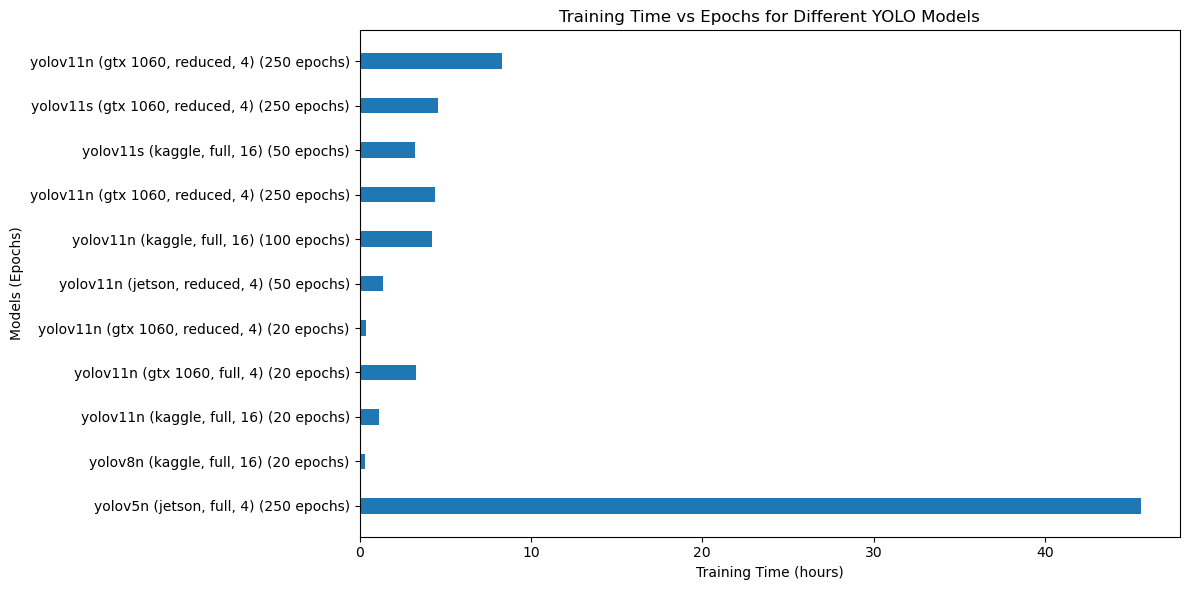

In [36]:
# Filter out the models with a defined training time
filtered_results = {key: value for key, value in trainingResults.items() if "training_time" in value}

# Prepare data for plotting
epochs = []
training_times = []
labels = []

for result in filtered_results.values():
    epochs.append(result["epochs"])
    training_times.append(result["training_time"])
    label = f"{result['model']} ({result['platform']}, {result['dataset']}, {result['batch-size']})"
    labels.append(label)

# Plot the data as a horizontal bar plot with number of epochs
plt.figure(figsize=(12, 6))
bar_width = 0.35
indices = range(len(epochs))

# Create horizontal bars
plt.barh(indices, training_times, height=0.35)

# Labeling
plt.ylabel('Models (Epochs)')
plt.xlabel('Training Time (hours)')
plt.title('Training Time vs Epochs for Different YOLO Models')

# Combine model name and number of epochs for y-axis labels
labels_with_epochs = [f"{label} ({epochs[i]} epochs)" for i, label in enumerate(labels)]

plt.yticks(indices, labels_with_epochs)
plt.tight_layout()

# Display the plot
plt.show()

## Plot Precision over epochs

yolov11n_250_epochs_10_patience_reduced_dataset
Precision: 0      0.41904
1      0.46018
2      0.42658
3      0.54669
4      0.55351
        ...   
140    0.86310
141    0.86691
142    0.84049
143    0.83060
144    0.87549
Name: metrics/precision(B), Length: 145, dtype: float64
yolov11n_250_epochs_100_patience_reduced_dataset
Precision: 0      0.41904
1      0.46018
2      0.42658
3      0.54669
4      0.55351
        ...   
245    0.87099
246    0.86958
247    0.82963
248    0.82514
249    0.83065
Name: metrics/precision(B), Length: 250, dtype: float64


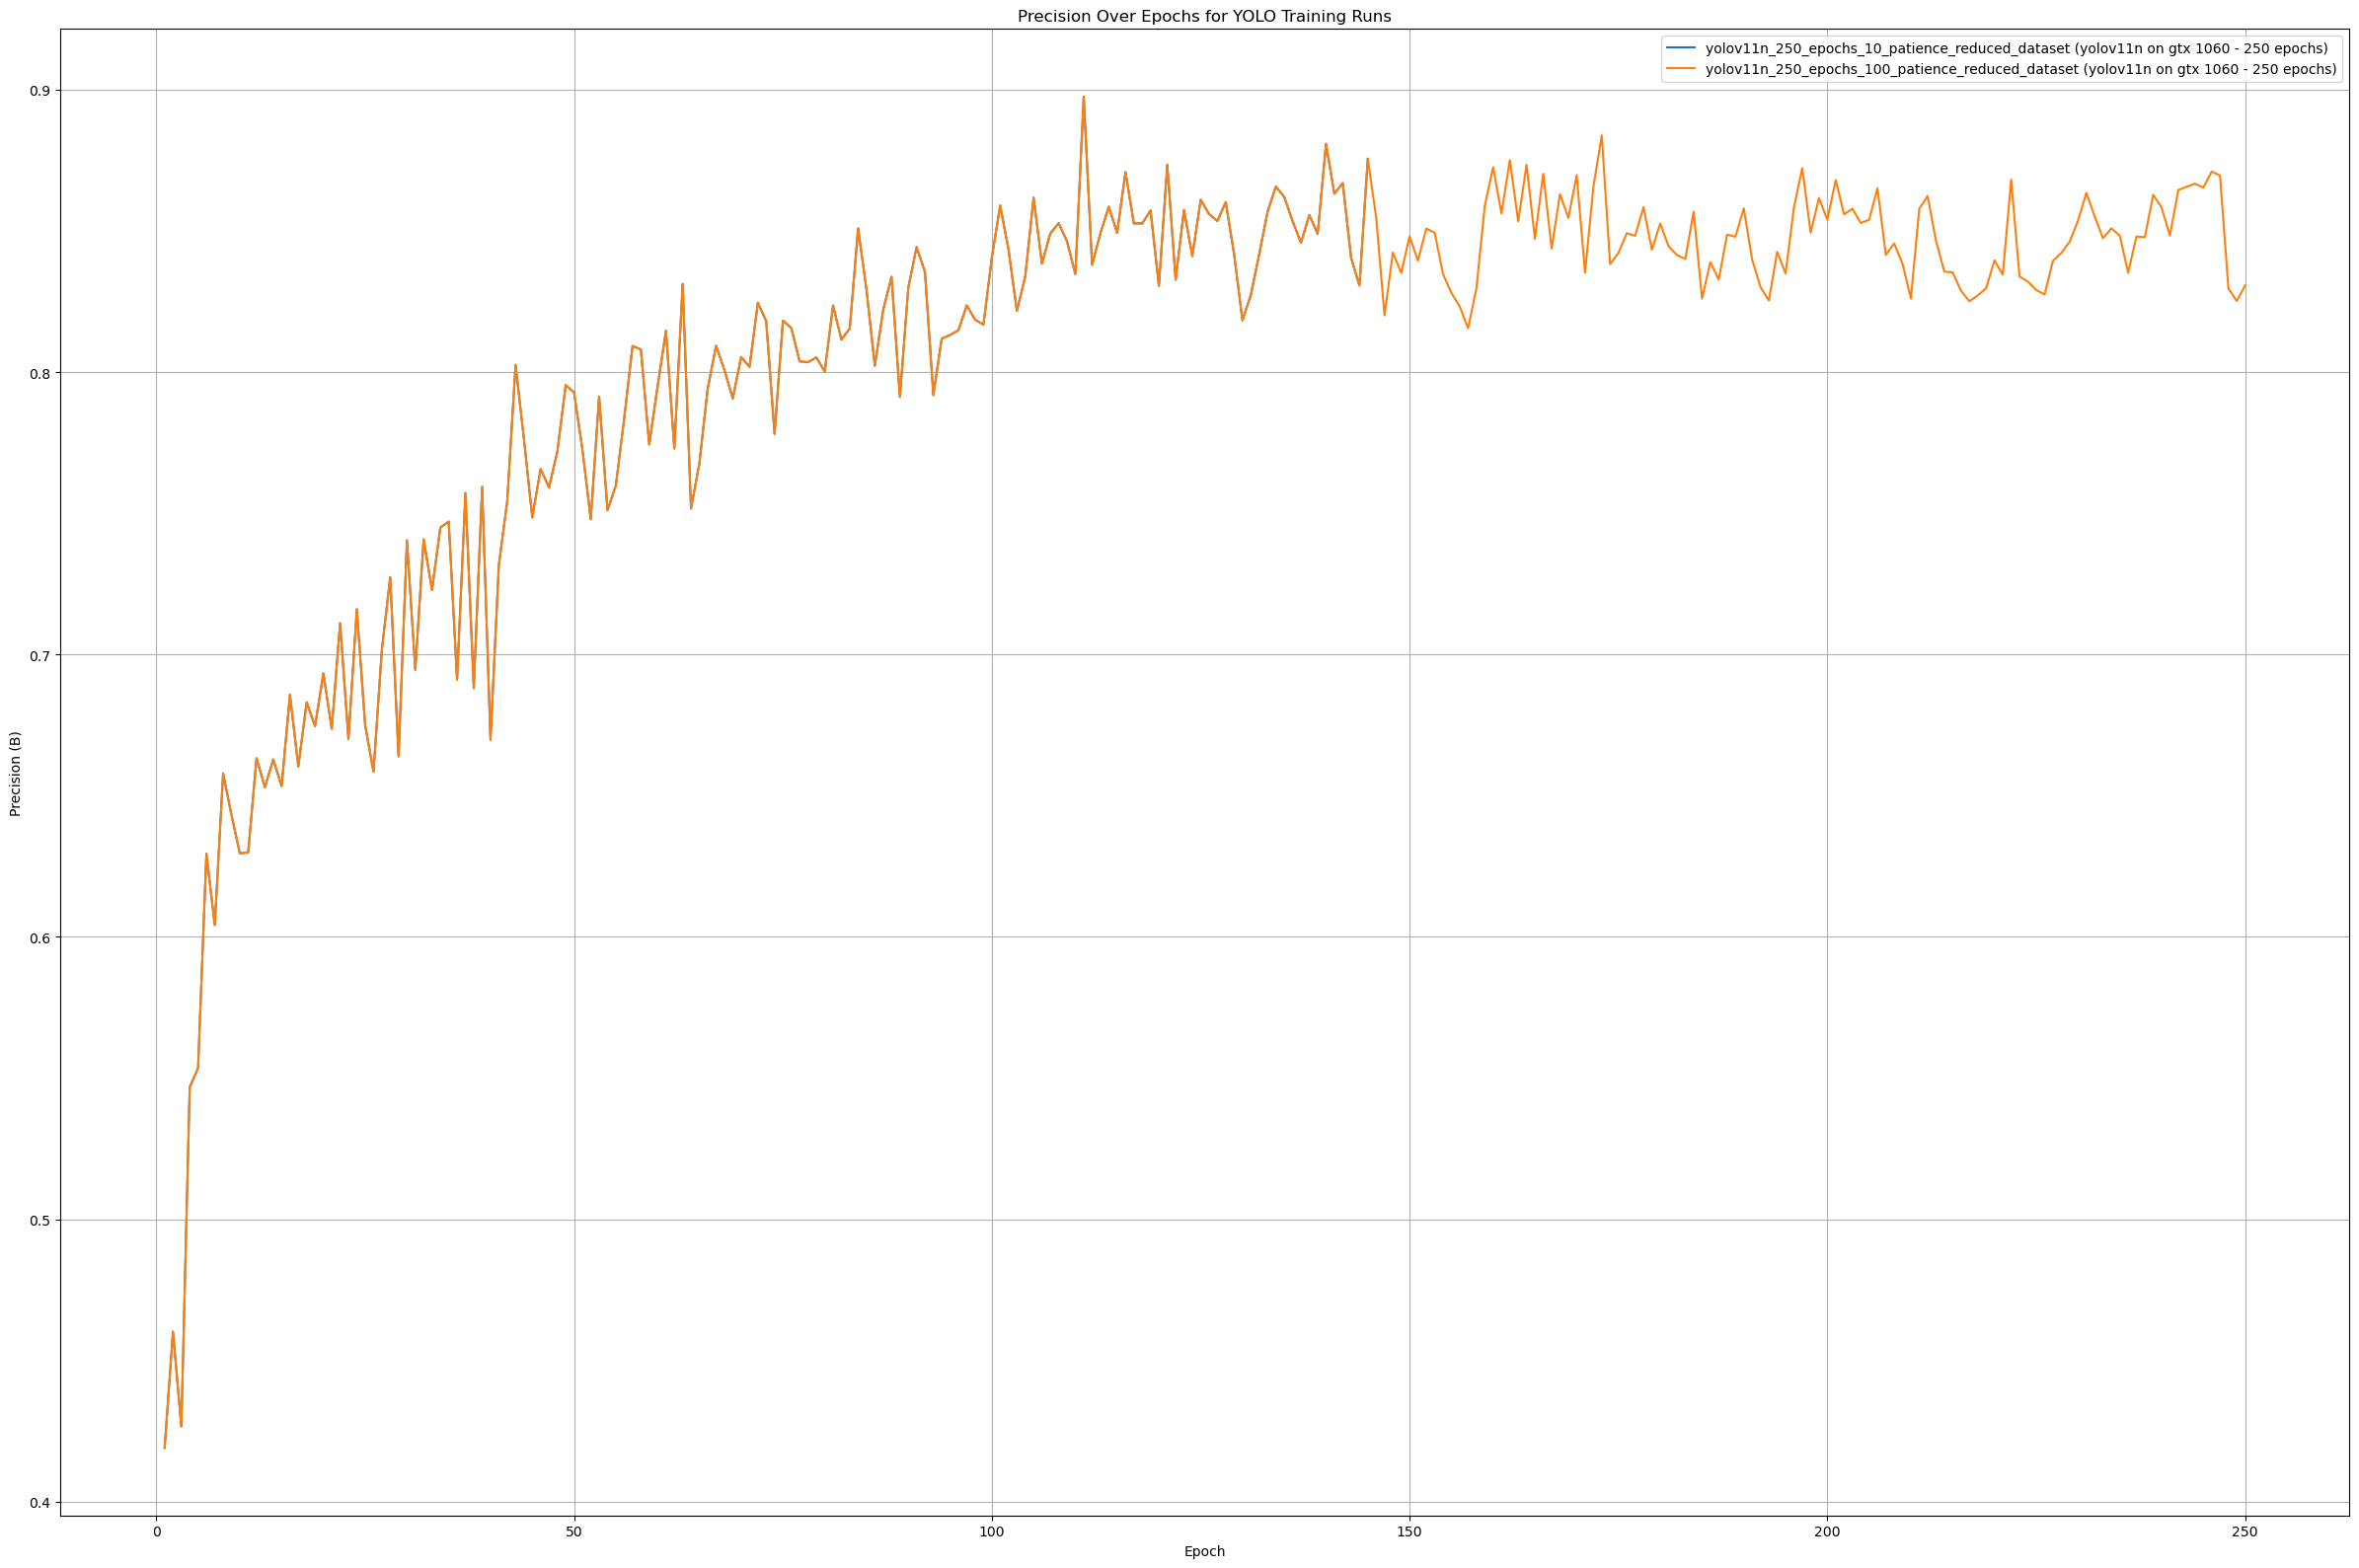

In [37]:
# Filter out entries with a defined 'path'
valid_entries = {key: val for key, val in trainingResults.items() if 'path' in val and os.path.exists(val['path'])}

# Initialize a plot
plt.figure(figsize=(24, 16))

# Process each valid entry
for key, details in valid_entries.items():
    if key not in ["yolov11n_250_epochs_10_patience_reduced_dataset", "yolov11n_250_epochs_100_patience_reduced_dataset"]:
        continue
    print(key)
    try:
        # Read the CSV file
        df = pd.read_csv(details['path'])
        
        # Extract epoch and precision
        epochs = df['epoch']
        precision = df['metrics/precision(B)']
        
        # Generate a label
        label = f"{key} ({details['model']} on {details['platform']} - {details['epochs']} epochs)"

        print(f"Precision: {precision}")

        
        # Plot precision over epochs
        plt.plot(epochs, precision, label=label)
    
    except Exception as e:
        print(f"Error processing {key}: {e}")

# Customize the plot
plt.title("Precision Over Epochs for YOLO Training Runs")
plt.xlabel("Epoch")
plt.ylabel("Precision (B)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


## Plot Recall over Epochs

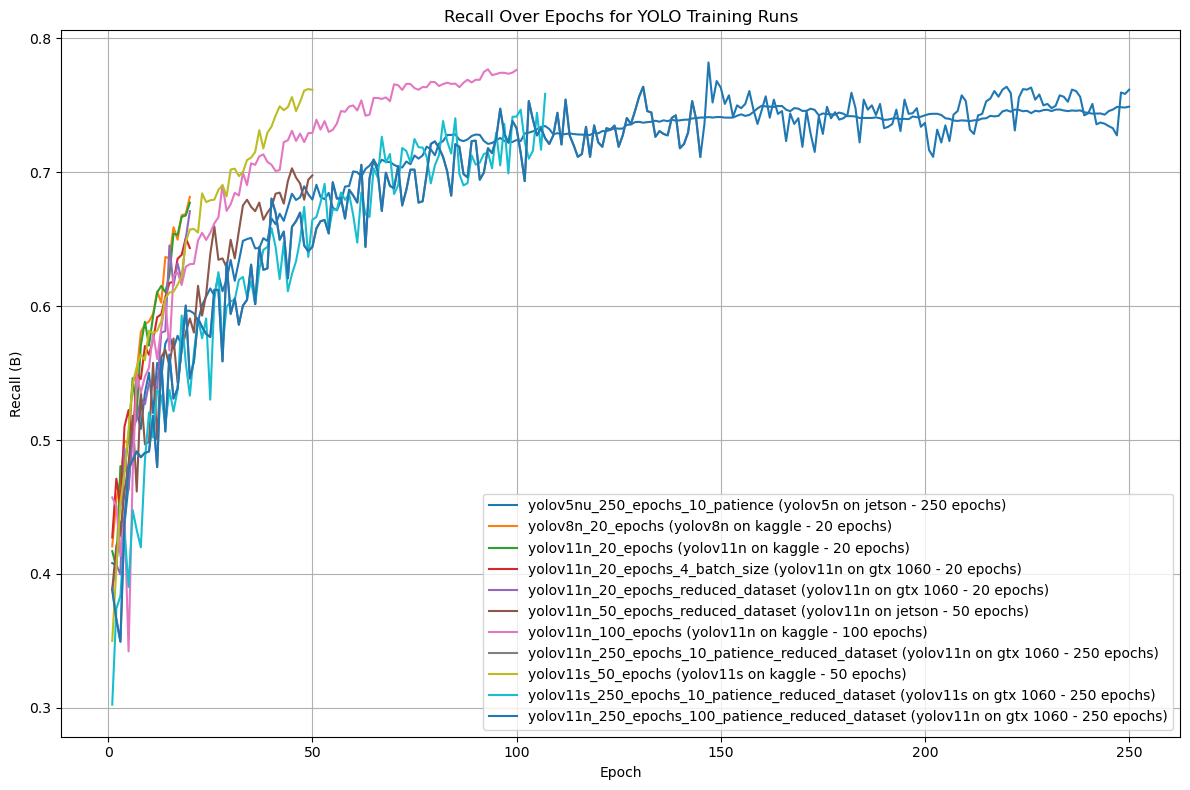

In [38]:
# Filter out entries with a defined 'path'
valid_entries = {key: val for key, val in trainingResults.items() if 'path' in val and os.path.exists(val['path'])}

# Initialize a plot
plt.figure(figsize=(12, 8))

# Process each valid entry
for key, details in valid_entries.items():
    try:
        # Read the CSV file
        df = pd.read_csv(details['path'])
        
        # Extract epoch and recall
        epochs = df['epoch']
        recall = df['metrics/recall(B)']
        
        # Generate a label
        label = f"{key} ({details['model']} on {details['platform']} - {details['epochs']} epochs)"
        
        # Plot recall over epochs
        plt.plot(epochs, recall, label=label)
    
    except Exception as e:
        print(f"Error processing {key}: {e}")

# Customize the plot
plt.title("Recall Over Epochs for YOLO Training Runs")
plt.xlabel("Epoch")
plt.ylabel("Recall (B)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## Plot Precision-Recall over Epochs

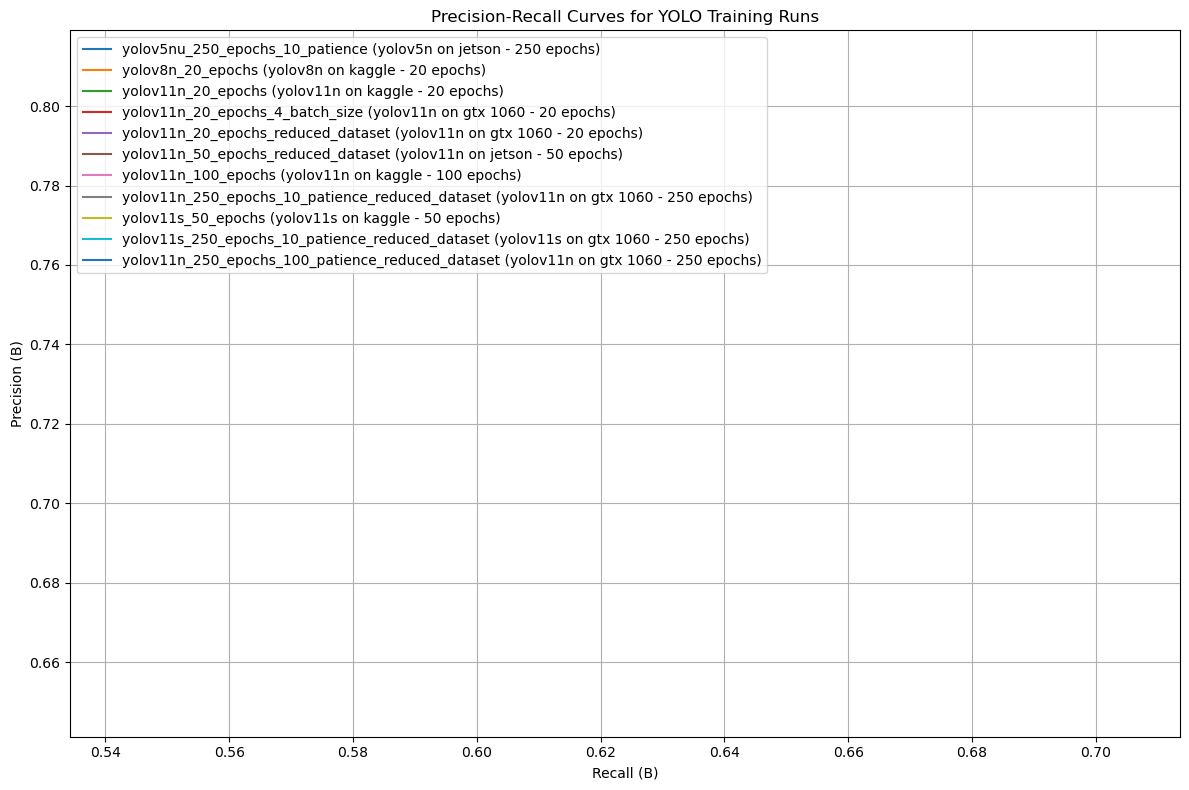

In [39]:
# Filter out entries with a defined 'path'
valid_entries = {key: val for key, val in trainingResults.items() if 'path' in val and os.path.exists(val['path'])}

# Initialize a plot
plt.figure(figsize=(12, 8))

# Process each valid entry
for key, details in valid_entries.items():
    try:
        # Read the CSV file
        df = pd.read_csv(details['path'])
        
        # Extract precision and recall
        precision = df['metrics/precision(B)']
        recall = df['metrics/recall(B)']
        avg_precision = precision.mean()
        avg_recall = recall.mean()

        
        # Generate a label
        label = f"{key} ({details['model']} on {details['platform']} - {details['epochs']} epochs)"
        
        # Plot precision-recall curve
        plt.plot(avg_recall, avg_precision, label=label)
    
    except Exception as e:
        print(f"Error processing {key}: {e}")

# Customize the plot
plt.title("Precision-Recall Curves for YOLO Training Runs")
plt.xlabel("Recall (B)")
plt.ylabel("Precision (B)")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

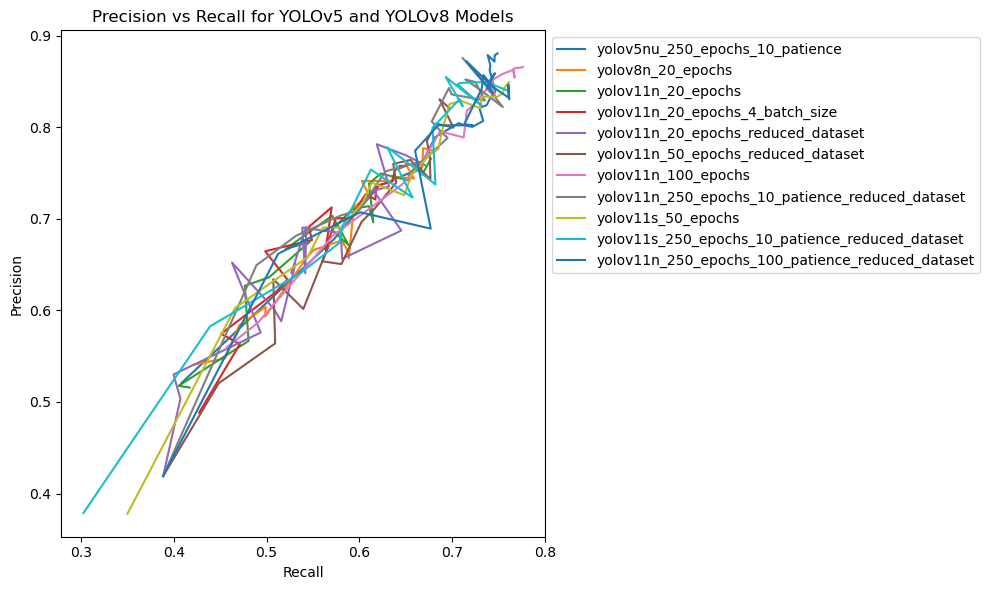

In [40]:
# Filter out entries with a defined 'path'
valid_entries = {key: val for key, val in trainingResults.items() if 'path' in val and os.path.exists(val['path'])}

# Initialize lists to store precision, recall, and labels for plotting
precision_list = []
recall_list = []
labels = []

# Determine the minimum number of epochs across all runs with defined paths
min_epochs = float('inf')

# First, iterate through the dictionary to find runs with a defined path and determine the minimum epochs
for key, value in valid_entries.items():
    if "path" in value and os.path.exists(value["path"]):
        # Load the CSV data for the current run
        df = pd.read_csv(value["path"])
        
        # Update the minimum number of epochs
        min_epochs = min(min_epochs, len(df))
        
# Now, iterate again to extract and interpolate the data
for key, value in valid_entries.items():
    if "path" in value and os.path.exists(value["path"]):
        # Load the CSV data for the current run
        df = pd.read_csv(value["path"])
        
        # Extract precision and recall values from the 'metrics/precision(B)' and 'metrics/recall(B)' columns
        precision = df['metrics/precision(B)'].values
        recall = df['metrics/recall(B)'].values
        
        # Interpolate precision and recall values to match the minimum number of epochs
        epochs = np.arange(len(df))  # Epochs based on the current data
        new_epochs = np.linspace(0, len(df) - 1, min_epochs)  # New epoch range (minimum number of epochs)
        
        # Interpolate precision and recall to the same number of points
        precision_interp = np.interp(new_epochs, epochs, precision)
        recall_interp = np.interp(new_epochs, epochs, recall)
        
        # Add interpolated precision, recall, and label for this run
        precision_list.append(precision_interp)
        recall_list.append(recall_interp)
        labels.append(key)

# Create a plot for Precision vs Recall
plt.figure(figsize=(10, 6))

# Plot the precision vs recall for each run
for i in range(len(precision_list)):
    plt.plot(recall_list[i], precision_list[i], label=labels[i])

# Set plot labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall for YOLOv5 and YOLOv8 Models')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()

# Batch Size

## Plot Precision

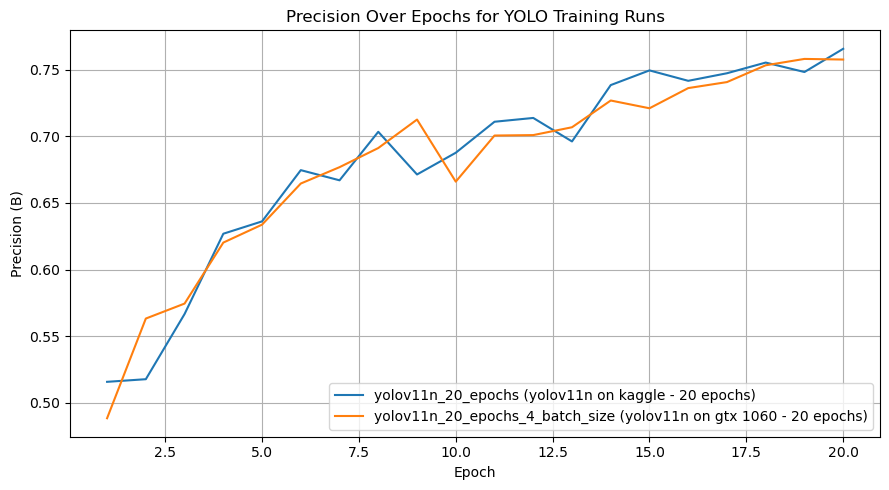

In [45]:
# Filter out entries with a defined 'path'
valid_entries = {key: val for key, val in trainingResults.items() if 'path' in val and os.path.exists(val['path'])}
valid_entries = {key: val for key, val in valid_entries.items() if key in ["yolov11n_20_epochs", "yolov11n_20_epochs_4_batch_size"]}

# Initialize a plot
plt.figure(figsize=(9, 5))

# Process each valid entry
for key, details in valid_entries.items():
    try:
        # Read the CSV file
        df = pd.read_csv(details['path'])
        
        # Extract epoch and precision
        epochs = df['epoch']
        precision = df['metrics/precision(B)']
        
        # Generate a label
        label = f"{key} ({details['model']} on {details['platform']} - {details['epochs']} epochs)"
        
        # Plot precision over epochs
        plt.plot(epochs, precision, label=label)
    
    except Exception as e:
        print(f"Error processing {key}: {e}")

# Customize the plot
plt.title("Precision Over Epochs for YOLO Training Runs")
plt.xlabel("Epoch")
plt.ylabel("Precision (B)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


## Plot Recall

Model: yolov11n_20_epochs, Recall: 0     0.41698
1     0.40517
2     0.48050
3     0.47649
4     0.50264
5     0.54624
6     0.52039
7     0.57076
8     0.58837
9     0.57054
10    0.59252
11    0.61025
12    0.61511
13    0.61043
14    0.62313
15    0.65411
16    0.65322
17    0.66674
18    0.66773
19    0.67729
Name: metrics/recall(B), dtype: float64, Epochs: 0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
Name: epoch, dtype: int64
Model: yolov11n_20_epochs_4_batch_size, Recall: 0     0.42723
1     0.47114
2     0.45086
3     0.51014
4     0.52240
5     0.49848
6     0.54892
7     0.54558
8     0.57019
9     0.56363
10    0.57464
11    0.59175
12    0.59394
13    0.60686
14    0.61734
15    0.61821
16    0.63539
17    0.63836
18    0.65091
19    0.64341
Name: metrics/recall(B), dtype: float64, Epochs: 0      1
1      2
2      3
3      4
4      5
5      6

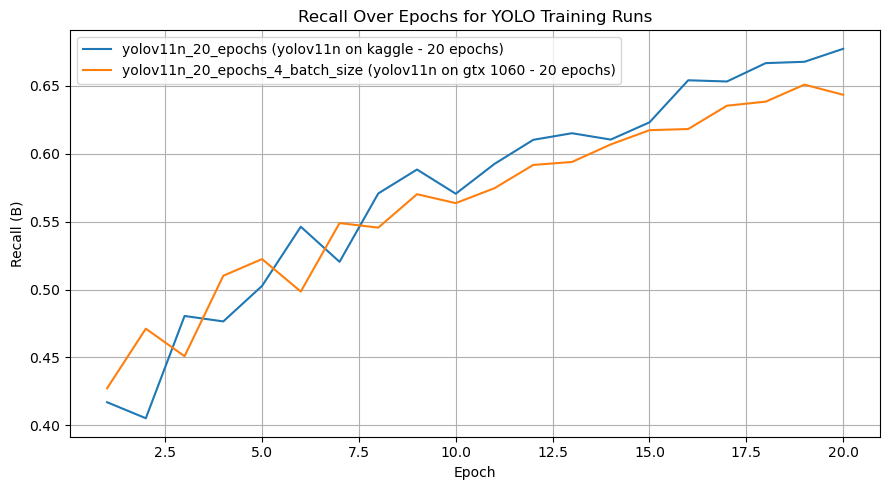

In [ ]:
# Filter out entries with a defined 'path'
valid_entries = {key: val for key, val in trainingResults.items() if 'path' in val and os.path.exists(val['path'])}
valid_entries = {key: val for key, val in valid_entries.items() if key in ["yolov11n_20_epochs", "yolov11n_20_epochs_4_batch_size"]}

# Initialize a plot
plt.figure(figsize=(9, 5))

# Process each valid entry
for key, details in valid_entries.items():
    try:
        # Read the CSV file
        df = pd.read_csv(details['path'])
        
        # Extract epoch and recall
        epochs = df['epoch']
        recall = df['metrics/recall(B)']
        
        # Generate a label
        label = f"{key} ({details['model']} on {details['platform']} - {details['epochs']} epochs)"
        
        # Plot recall over epochs
        plt.plot(epochs, recall, label=label)
    
    except Exception as e:
        print(f"Error processing {key}: {e}")

# Customize the plot
plt.title("Recall Over Epochs for YOLO Training Runs")
plt.xlabel("Epoch")
plt.ylabel("Recall (B)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## Bar Plot of mAP50-95, mAP50 and mAP75

Model: yolov11n, mAP50-95: 0.42798, mAP50: 0.75343, mAP75: 0.5650725000000001
Model: yolov11n, mAP50-95: 0.39307, mAP50: 0.72596, mAP75: 0.54447


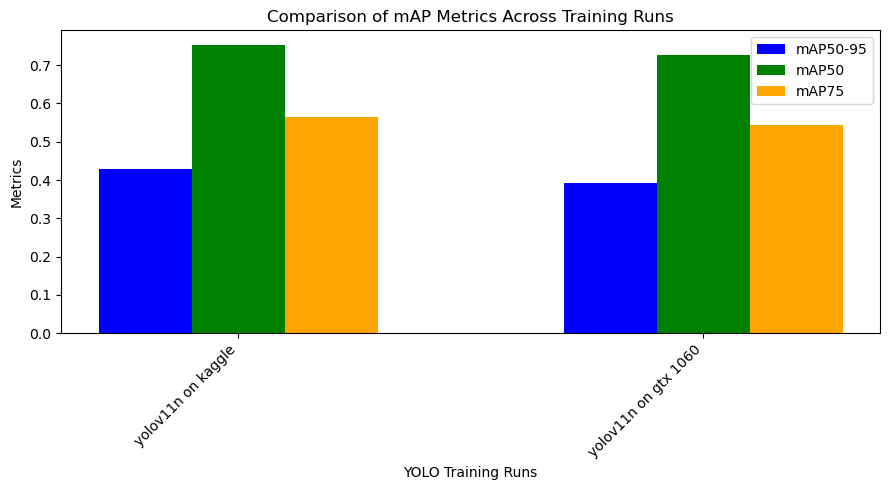

In [50]:
# Initialize lists for bar plot
entry_labels = []
mAP50_95_values = []
mAP50_values = []
mAP75_values = []

# Process each valid entry
for key, details in valid_entries.items():
    try:
        # Read the CSV file
        df = pd.read_csv(details['path'])
        
        # Extract metrics from the last epoch
        mAP50_95 = df['metrics/mAP50-95(B)'].iloc[-1]
        mAP50 = df['metrics/mAP50(B)'].iloc[-1]
        mAP75 = (df['metrics/mAP50(B)'] * 0.75).iloc[-1]  # Assuming mAP75 is not directly available, using 75% of mAP50 for now
        
        # Append to lists
        entry_labels.append(f"{details['model']} on {details['platform']}")
        mAP50_95_values.append(mAP50_95)
        mAP50_values.append(mAP50)
        mAP75_values.append(mAP75)
        print(f"Model: {details['model']}, mAP50-95: {mAP50_95}, mAP50: {mAP50}, mAP75: {mAP75}")
    
    except Exception as e:
        print(f"Error processing {key}: {e}")

# Create the bar plot
bar_width = 0.2
index = range(len(entry_labels))

plt.figure(figsize=(9, 5))
plt.bar(index, mAP50_95_values, bar_width, label="mAP50-95", color="blue")
plt.bar([i + bar_width for i in index], mAP50_values, bar_width, label="mAP50", color="green")
plt.bar([i + 2 * bar_width for i in index], mAP75_values, bar_width, label="mAP75", color="orange")

# Add labels and legend
plt.xlabel("YOLO Training Runs")
plt.ylabel("Metrics")
plt.title("Comparison of mAP Metrics Across Training Runs")
plt.xticks([i + bar_width for i in index], entry_labels, rotation=45, ha="right")
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()